In [247]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.power as smp
import numpy as np
from scipy.stats import ttest_ind

In [248]:
df = pd.read_csv('Контроль длительности. Домашнее задание (исходник).csv', parse_dates = [1,2] , sep = ';')

In [249]:
df.dtypes

id_order                int64
order_time     datetime64[ns]
assign_time    datetime64[ns]
dtype: object

In [250]:
df['diff_time'] = df ['assign_time']- df['order_time']

In [251]:
df['diff_time'] = df['diff_time'].dt.seconds

In [413]:
df.head(3)

,id_order,order_time,assign_time,diff_time
0,11453191,2022-01-08 16:03:16,2022-01-08 16:06:28,192
1,11455385,2022-01-08 07:43:29,2022-01-08 07:44:27,58
2,11458079,2022-01-08 13:27:06,2022-01-08 13:31:46,280


In [414]:
df.describe()

,id_order,diff_time
count,5.896000e+03,5896.000000
mean,1.145607e+07,174.974729
std,1.702173e+03,192.227905
min,1.145312e+07,0.000000
25%,1.145459e+07,95.000000
50%,1.145607e+07,141.000000
75%,1.145754e+07,187.000000
max,1.145902e+07,1235.000000


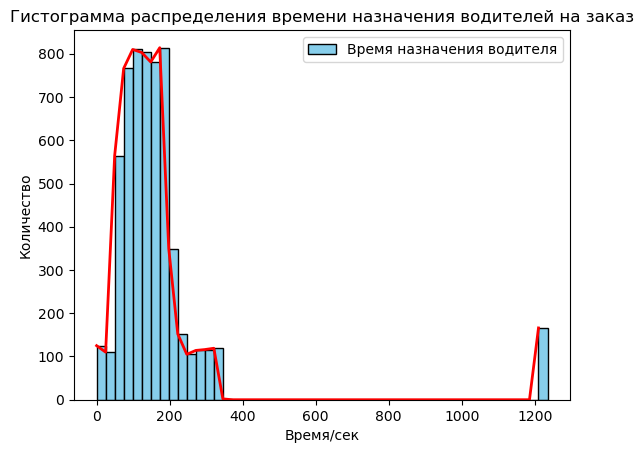

In [254]:
df_1 = df['diff_time']
heights,edges,patches = plt.hist(df_1, bins = 50, color = 'skyblue',edgecolor = 'black', label = 'Время назначения водителя')
plt.plot(edges[:-1], heights, 'r-', linewidth = 2)
plt.title ('Гистограмма распределения времени назначения водителей на заказ')
plt.xlabel('Время/сек')
plt.ylabel ('Количество')
plt.legend(loc = 'upper right')
plt.show()


In [358]:
print (" На гистограмме видно, что в столбце diff_time присутствуют выбросы")

 На гистограмме видно, что в столбце diff_time присутствуют выбросы


In [257]:
MDE = 5

In [259]:
df_time_assign = df[['diff_time']]

In [295]:
df_time_assign

,diff_time
0,192
1,58
2,280
3,158
4,125
...,...
5891,161
5892,321
5893,266
5894,131


In [271]:
mean = df['diff_time'].mean()
print(mean)

174.97472862957937


In [272]:
sigma = mean*(1-mean)
print(sigma)

-30441.180930365364


In [279]:
def calc_n_abtest (MDE,sigma):
    n = 16*(sigma)/(MDE**2)
    return n 

In [310]:
n_abs = calc_n_abtest(5, df_time_assign ['diff_time']. var())
print("Необходимое количество наблюдений: ", n_abs)

Необходимое количество наблюдений:  23649.00328924892


In [ ]:
### Избавьтесь от выбросов (с помощью визуализации или квантильного анализа). 
### Вновь рассчитайте время, необходимое для проведения эксперимента. На сколько оно уменьшилось?

In [179]:
num_sim = 100
outliers_limit = 1200

lift_list_50 = []
lift_list_approx = []

for i in range(num_sim):
    df_out_a = df.sample(frac = 0.5)
    df_out_b = df.drop(df_out_a.index)
    l = df_out_b ['diff_time'].mean() - df_out_a ['diff_time'].mean()
    lift_list_50.append(l)
    
    
df_net_outliers = df [df['diff_time'] <= outliers_limit] 
for i in range(num_sim):
    df_out_a = df_net_outliers.sample(frac = 0.5)
    df_out_b = df_net_outliers.drop(df_out_a.index)
    l = df_out_b ['diff_time'].mean() - df_out_a ['diff_time'].mean()
    lift_list_approx.append(l)

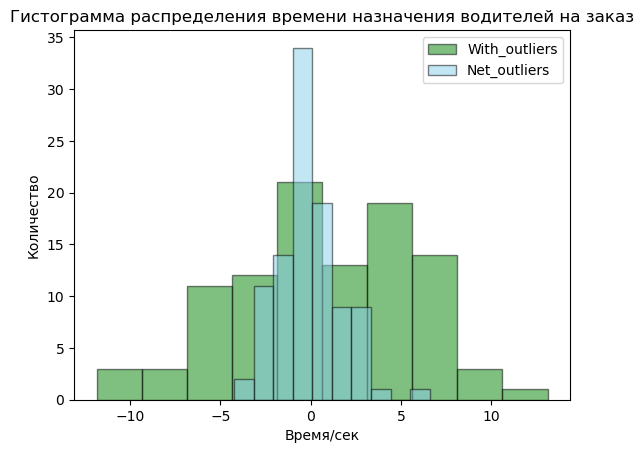

In [187]:
plt.hist(lift_list_50 , alpha = 0.5, label = 'With_outliers', edgecolor = 'black', color = 'green')
plt.hist(lift_list_approx , alpha = 0.5, label = 'Net_outliers', edgecolor = 'black', color = 'skyblue' )
plt.title ('Гистограмма распределения времени назначения водителей на заказ')
plt.xlabel('Время/сек')
plt.ylabel ('Количество')
plt.legend(loc = 'upper right')
plt.show()


In [ ]:
## Очистив выборку от выбросов , видно что гистограмма изменилась. На гистограмме без выбросов дисперсия меньше,
## а значит нам потребуется меньше времени на проведение эксперимента

In [322]:
df_net_outliers .describe()

,id_order,diff_time
count,5.730000e+03,5730.000000
mean,1.145599e+07,144.284293
std,1.654253e+03,67.541357
min,1.145312e+07,0.000000
25%,1.145455e+07,94.000000
50%,1.145599e+07,139.000000
75%,1.145742e+07,183.000000
max,1.145885e+07,346.000000


In [323]:
df_1_net_outliers = df_net_outliers[['diff_time']]

In [311]:
mean_net_outliers = df_net_outliers['diff_time'].mean()
print(mean_net_outliers)

144.28429319371728


In [415]:
sigma_net_outliers = mean_net_outliers*(1-mean_net_outliers)
print(sigma_net_outliers)

-20673.672969216852


In [416]:
def calc_n_abtest (MDE,sigma):
    n = 16*(sigma)/(MDE**2)
    return n 

In [417]:
n_abs_net_outliers = calc_n_abtest(5, df_1_net_outliers['diff_time']. var())
print("Необходимое количество наблюдений (без выбросов) = " , n_abs_net_outliers)

Необходимое количество наблюдений (без выбросов) =  2919.574307433748


In [418]:
n_abs_diff = n_abs - n_abs_net_outliers 
print("Pазница в необходимом кол-ве наблюдений (с учетом выбросов и без учета выбросов) = " , n_abs_diff )

Pазница в необходимом кол-ве наблюдений (с учетом выбросов и без учета выбросов) =  0.0


In [436]:
print ("Мы видим,  что кол-во необходимых наблюдений после очистки значений от выбросов  стало в 8 раз меньше")
       

Мы видим,  что кол-во необходимых наблюдений после очистки значений от выбросов  стало в 8 раз меньше


In [420]:
### Замените абсолютную таргет-метрику (время до назначения) на бинарную метрику (флаг “назначение длилось дольше чем Х секунд”). 
### Возьмите для начала Х = 120 секунд.

In [421]:
df_1_net_outliers.head()

,diff_time,flaf_assign_more_120
0,192,1
1,58,0
2,280,1
3,158,1
4,125,1


In [422]:
df_1_net_outliers['flaf_assign_more_120'] = np.where(df_1_net_outliers['diff_time']>=120, 1,0)

C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\961146159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_net_outliers['flaf_assign_more_120'] = np.where(df_1_net_outliers['diff_time']>=120, 1,0)


In [423]:
m = df_1_net_outliers['diff_time'].mean() # среднее для всех значений
m_120 = df_1_net_outliers [df_1_net_outliers['diff_time']>= 120]['diff_time'].mean() # среднее для значений >=120
m_less_120 = df_1_net_outliers [df_1_net_outliers['diff_time'] < 120]['diff_time'].mean()
print("Среднее по всей выборке:", m)
print("Среднее по выборке c временем назначения >= 120c :", m_120)
print("Среднее по выборке c временем назначения < 120c :", m_less_120)

Среднее по всей выборке: 144.28429319371728
Среднее по выборке c временем назначения >= 120c : 184.73992569305517
Среднее по выборке c временем назначения < 120c : 80.83549977588525


In [424]:
count = df_1_net_outliers['diff_time'].count() # кол-во для всех значений
count_120 = df_1_net_outliers [df_1_net_outliers['diff_time']>= 120]['diff_time'].count() # кол-во для значений >=120
count_less_120 = df_1_net_outliers [df_1_net_outliers['diff_time'] < 120]['diff_time'].count()
print("Размер всей выборки:", count)
print("Размер выборки c временем назначения >= 120c :", count_120)
print("Размер выборки c временем назначения < 120c :", count_less_120)

Размер всей выборки: 5730
Размер выборки c временем назначения >= 120c : 3499
Размер выборки c временем назначения < 120c : 2231


In [425]:
var = df_1_net_outliers['diff_time'].var()
var_120 = df_1_net_outliers['flaf_assign_more_120'].var()
print("Доля наблюдений >= 120c :", var)
print("Доля наблюдений < 120c :", var_120)

Доля наблюдений >= 120c : 4561.834855365231
Доля наблюдений < 120c : 0.23779902440569345


In [426]:
### Создайте у себя в тетрадке функцию uplift_bin_calc, которая берет на вход MDE и дисперсию выборки,
### а на выходе дает необходимое количество наблюдений для проведения A/B теста.

In [427]:
def uplift_bin_calc(p1,p2,x1,x2,y,delta_y):
    uplift_x = (y+delta_y-p1*x1-p2*x2)/(x1-x2)
    return uplift_x

In [428]:
### Рассмотрите другие пороги Х. Постройте цикл, который будет пробегаться по различным значениям Х и рассчитывать необходимое количество наблюдений.
### Сохраните результаты в датафрейм.

In [435]:
df_res = pd.DataFrame(columns = ['limit', 'ratio_more','ratio_less', 'n_bin', 'n_abs'])
for i in range(0,346):
    mult = i*5
    c_more_120 = df_1_net_outliers [df_1_net_outliers['diff_time']>= mult]['diff_time'].count()
    c_less_120 = df_1_net_outliers [df_1_net_outliers['diff_time'] < mult]['diff_time'].count()
    ratio_more = c_more_120/(c_more_120+c_less_120)
    ratio_less = c_less_120 /(c_more_120+c_less_120)
    m_more_120 = df_1_net_outliers [df_1_net_outliers['diff_time']>= mult]['diff_time'].mean()
    m_less_120 = df_1_net_outliers [df_1_net_outliers['diff_time'] < mult]['diff_time'].mean()
    m = df_1_net_outliers['diff_time'].mean()
    var_abs = df_1_net_outliers['diff_time'].var()
    var_bin = ratio_more*(1-ratio_more)
    
    u = uplift_bin_calc(c_more_120/(c_more_120+c_less_120), c_less_120 /(c_more_120+c_less_120), m_more_120, m_less_120, m, 5 )
    n_bin = calc_n_abtest(u, var_bin)
    n_abs = calc_n_abtest(5, var_abs)
    
    df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':n_abs}, ignore_index = True)


C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':n_abs}, ignore_index = True)
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':n_abs}, ignore_index = True)
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':

C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':n_abs}, ignore_index = True)
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':n_abs}, ignore_index = True)
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':

C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':n_abs}, ignore_index = True)
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':n_abs}, ignore_index = True)
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':

C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':n_abs}, ignore_index = True)
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':n_abs}, ignore_index = True)
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':

C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':n_abs}, ignore_index = True)
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':n_abs}, ignore_index = True)
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':

C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':n_abs}, ignore_index = True)
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':n_abs}, ignore_index = True)
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':

C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':n_abs}, ignore_index = True)
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':n_abs}, ignore_index = True)
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':

C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':n_abs}, ignore_index = True)
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':n_abs}, ignore_index = True)
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':

C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':n_abs}, ignore_index = True)
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':n_abs}, ignore_index = True)
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':

C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':n_abs}, ignore_index = True)
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':n_abs}, ignore_index = True)
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':

C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':n_abs}, ignore_index = True)
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':n_abs}, ignore_index = True)
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':

C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':n_abs}, ignore_index = True)
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':n_abs}, ignore_index = True)
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_9316\2975031268.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({'limit':mult, 'ratio_more': ratio_more ,'ratio_less':ratio_less, 'n_bin':n_bin, 'n_abs':

In [434]:
df_res.head(40)

,limit,ratio_more,ratio_less,n_bin,n_abs
0,0.0,1.000000,0.000000,NaN,2919.574307
1,5.0,0.995113,0.004887,63.082721,2919.574307
2,10.0,0.989703,0.010297,129.300234,2919.574307
3,15.0,0.985340,0.014660,179.581387,2919.574307
4,20.0,0.981326,0.018674,222.766751,2919.574307
5,25.0,0.978185,0.021815,253.585519,2919.574307
6,30.0,0.973473,0.026527,296.743491,2919.574307
7,35.0,0.968761,0.031239,336.592109,2919.574307
8,40.0,0.964747,0.035253,367.714968,2919.574307
9,45.0,0.961257,0.038743,392.090438,2919.574307


In [409]:
print("Нам нужно 2919 наблюдений, чтобы обнаружить разницу MDE = 5сек. Оптимальный вариант с точки зрения информативности для бинарной метрики, где соотношение между группами  50/50 , это примерно 1814 наблюдений. Однако, по сравнению с абсолютным экспериментом,   нет гарантии получения более точного результата.")

Нам нужно 2919 наблюдений, чтобы обнаружить разницу MDE = 5сек. Оптимальный вариант с точки зрения информативности для бинарной метрики, где соотношение между группами  50/50 , это примерно 1814 наблюдений. Однако, по сравнению с абсолютным экспериментом,   нет гарантии получения более точного результата.


In [ ]:
### Изобразите на графике зависимость необходимого количества наблюдений от порога Х.

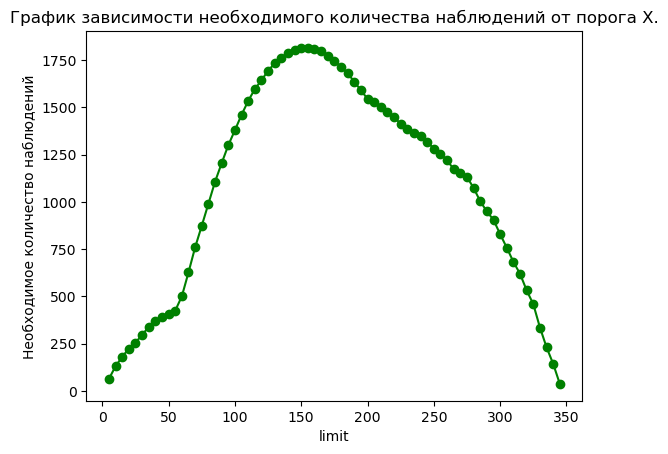

In [412]:
plt.plot(df_res['limit'],df_res['n_bin'], marker = 'o', linestyle = '-', color =  'g')
plt.xlabel('limit')
plt.ylabel('Необходимое количество наблюдений')
plt.title('График зависимости необходимого количества наблюдений от порога Х.')
plt.show()